In [1]:
import numpy  as np
import matplotlib.pyplot as plt

from utils import *

from hcipy import *

from processing import *

from astropy.io import fits

import csv

%load_ext autoreload
%autoreload 2

### Load the FITS file

In [2]:
name = "Test_Prime_BSI_Fast_Wind.fits"
#path_name = "Rolling Shutter Simulations\\" + name + ".fits"
fits_file = fits.open(name)


In [3]:
fits_file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TITLE   = 'Test_Prime_BSI_Fast_Wind'                                            
AUTHOR  = 'Written by Kyle Lam.'                                                
FPS     = '20 # Readout speed of the detector in fps'                           
DETSIZE = '512 # width of shortest side of detector.'                           
NSUBDIVI= '2 # Number of Subdivisions'                                          
Q       = '2 # Number of pixels per resolution element'                         
NAIRY   = '200 # The spatial extent of the grid radius in resolution elements'  
EXPOTIME= '0.1 # Exposure time in seconds'                                      
NUMEXPOS= '1 # Total Number 

In [4]:
im1 = fits_file[4].data
im2 = fits_file[2].data

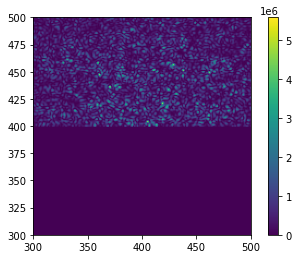

In [5]:
plt.imshow(im1)
plt.xlim(300,500)
plt.ylim(300,500)
plt.colorbar()

### Combine Image Data

In [71]:
npix = int(np.sqrt(np.prod(fits_file[1].data.shape)))
ims_out = []

for i in range(1, len(fits_file)):
    im = fits_file[i].data
    im_out = im.copy().reshape([npix,npix])
    ims_out.append(np.array(im_out))
ims_out_a = np.array(ims_out)

In [72]:
npix2 = int(np.sqrt(np.prod(fits_file2[1].data.shape)))
ims_out2 = []

for i in range(1, len(fits_file2)):
    im2 = fits_file2[i].data
    im_out2 = im2.copy().reshape([npix2,npix2])
    ims_out2.append(np.array(im_out2))
ims_out_a2 = np.array(ims_out2)

### Grabbing Values from Header Data

In [73]:
wavelength = fits_file[0].header['Wavelnth']
wavelength = wavelength.split(' ')
wavelength = float(wavelength[0])
pupil_diameter = fits_file[0].header['PUPDIAMT']
pupil_diameter = pupil_diameter.split(' ')
pupil_diameter = float(pupil_diameter[0])
mag = fits_file[0].header['PRIMAG']
mag = mag.split(' ')
mag = float(mag[0])


In [74]:
wavelength2 = fits_file2[0].header['Wavelnth']
wavelength2 = wavelength2.split(' ')
wavelength2 = float(wavelength2[0])
pupil_diameter2 = fits_file2[0].header['PUPDIAMT']
pupil_diameter2 = pupil_diameter2.split(' ')
pupil_diameter2 = float(pupil_diameter2[0])
mag2 = fits_file2[0].header['PRIMAG']
mag2 = mag2.split(' ')
mag2 = float(mag2[0])


### Image Processing
includes preprocessing, taking FTs, power spectra, and ACFs

In [75]:
# Function Parameters - see processing.py for more detail
# ims           - input image array
# ims_ft        - input FT array
# gsigma        - std deviation for the Gaussian kernel
# subframe_size - final image size in pixels
# HWHM          - half-wavelength at half maximum for supergaussian window
# m             - order of supergaussian window
# scaling       - determines radial cutoff (fcut) for PS

ims_p = image_preprocessing(ims_out_a, 10, 550)
#              parameters: (ims, gsigma, subframe_size)

FT = fourier_transform(ims_p, 100, 4)
#              parameters: (ims, HWHM, m)

PS = power_spectrum(FT, wavelength, pupil_diameter, 1.)
#              parameters: (ims_ft, wavelength, pupil_diameter, scaling, HWHM, m)

ACF = generate_ACF(PS)
#              parameters: (ims_ps)

In [76]:
# Function Parameters - see processing.py for more detail
# ims           - input image array
# ims_ft        - input FT array
# gsigma        - std deviation for the Gaussian kernel
# subframe_size - final image size in pixels
# HWHM          - half-wavelength at half maximum for supergaussian window
# m             - order of supergaussian window
# scaling       - determines radial cutoff (fcut) for PS

ims_p2 = image_preprocessing(ims_out_a2, 10, 550)
#              parameters: (ims, gsigma, subframe_size)

FT2 = fourier_transform(ims_p2, 100, 4)
#              parameters: (ims, HWHM, m)

PS2 = power_spectrum(FT2, wavelength2, pupil_diameter2, 1.)
#              parameters: (ims_ft, wavelength, pupil_diameter, scaling, HWHM, m)

ACF2 = generate_ACF(PS2)
#              parameters: (ims_ps)

Text(0, 0.5, 'Mean')

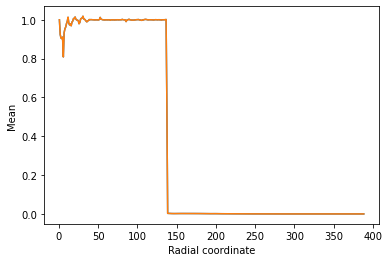

In [77]:
from radial_profile import radial_data

rad_stats = radial_data(PS[0])
rad_stats2 = radial_data(PS2[0])
plt.figure()
plt.plot(rad_stats.r, rad_stats.mean)
plt.plot(rad_stats2.r, rad_stats2.mean)
plt.xlabel('Radial coordinate')
plt.ylabel('Mean')

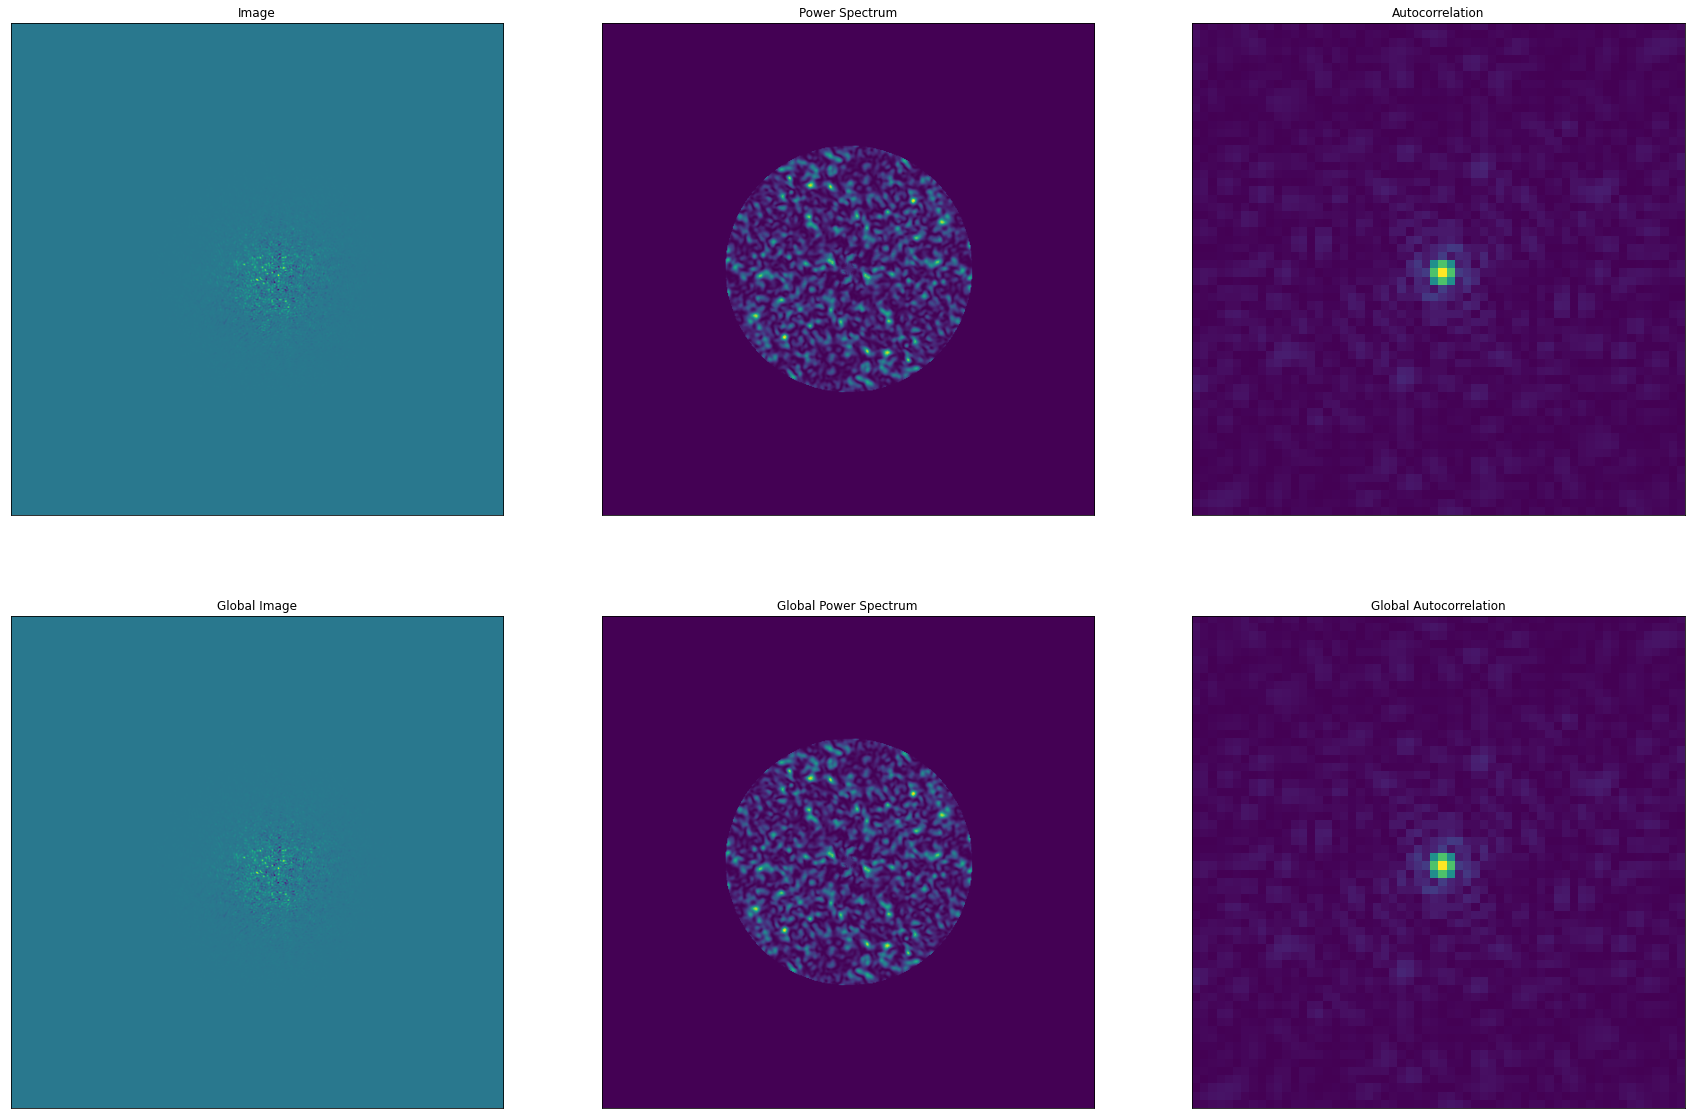

In [78]:
# Image, PS, and ACF plots
f = plt.figure(figsize=(30,20))
ax=f.add_subplot(231)
plt.imshow(ims_p[0])
ax.set_yticks([])
ax.set_xticks([])
plt.title('Image')


ax = f.add_subplot(232)
plt.title('Power Spectrum')
plt.imshow(np.abs(PS[0]))
ax.set_yticks([])
ax.set_xticks([])

fsub = 30
ax=f.add_subplot(233)
plt.imshow(np.abs(ACF[0])[int(550/2)-fsub:int(550/2)+fsub,int(550/2)-fsub:int(550/2)+fsub])
ax.set_yticks([])
ax.set_xticks([])
plt.title('Autocorrelation')

ax=f.add_subplot(234)
plt.imshow(ims_p2[0])
ax.set_yticks([])
ax.set_xticks([])
plt.title('Global Image')

ax = f.add_subplot(235)
plt.title('Global Power Spectrum')
plt.imshow(np.abs(PS2[0]))
ax.set_yticks([])
ax.set_xticks([])

fsub = 30
ax=f.add_subplot(236)
plt.imshow(np.abs(ACF2[0])[int(550/2)-fsub:int(550/2)+fsub,int(550/2)-fsub:int(550/2)+fsub])
ax.set_yticks([])
ax.set_xticks([])
plt.title('Global Autocorrelation')
plt.show()

plt.show()

# To save image:
#plt.savefig('speckle_imaging.png')

## Speckle Contrast Curve

In [79]:
# Grid: 800 pixels across, equalling 200 lambda / D, plate scale is then 0.25*lambda / D per pixel
plate_scale = 0.25 * wavelength / pupil_diameter * 206265.   #of image in (arcsec / pixel)

# Plate scale in meters per pixel
ps_mpp = 1. / (npix * plate_scale) * 206265. * wavelength 
scaling = 0.5
fcut = pupil_diameter / ps_mpp * scaling

C:\Users\User\Documents\Academic\Git\specklepol\processing.py:182: RuntimeWarning: invalid value encountered in sqrt
  ACF_ccs_out = -2.5*np.log10((1.-np.sqrt(1.-(2*ACF)**2))/(2*ACF))


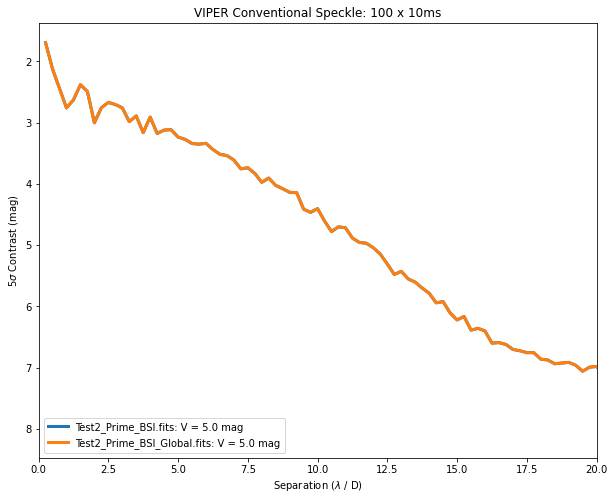

In [80]:
#Generating contrast curves

ACF_m = ACF_cc(ACF[0])
rad_ACF = radial_data(np.abs(ACF[0]), annulus_width=2)
cc = ACF_cc(5*rad_ACF.std)
xax = np.array(range(len(rad_ACF.mean))) * plate_scale / ((wavelength) / pupil_diameter * 206265) #in lambda/D units

ACF_m2 = ACF_cc(ACF2[0])
rad_ACF2 = radial_data(np.abs(ACF2[0]), annulus_width=2)
cc2 = ACF_cc(5*rad_ACF2.std)
xax2 = np.array(range(len(rad_ACF2.mean))) * plate_scale / ((wavelength) / pupil_diameter * 206265) #in lambda/D units

f = plt.figure(figsize=(10,8))
plt.plot(xax,cc,label=name +': V = '+str(mag)+' mag',lw=3)
plt.plot(xax2,cc2,label=name2+': V = '+str(mag)+' mag',lw=3)
plt.xlim(0.0,20.0)
plt.gca().invert_yaxis()
plt.legend(loc='lower left')
plt.ylabel(r'5$\sigma$ Contrast (mag)')
plt.xlabel(r'Separation ($\lambda$ / D)')
plt.title('VIPER Conventional Speckle: 100 x 10ms')
#plt.savefig('speckle_cont_conv_2.png',dpi=300)
plt.show()

In [81]:
contrast_curve_data = []
contrast_curve_data.append((cc))
contrast_curve_data.append((xax))
print(contrast_curve_data)


[array([       nan, 1.69601161, 2.12487586, 2.44303283, 2.76125059,
       2.62945293, 2.38230446, 2.49227995, 3.00337412, 2.75852765,
       2.67150927, 2.70542171, 2.75945355, 2.98425948, 2.89202375,
       3.16499803, 2.91064258, 3.17853813, 3.12330969, 3.11678068,
       3.23707421, 3.27419004, 3.34190109, 3.35304177, 3.33899051,
       3.4405861 , 3.51817276, 3.53884894, 3.6122715 , 3.7558431 ,
       3.73798391, 3.83063948, 3.97606569, 3.90619244, 4.02661932,
       4.0800692 , 4.13933538, 4.14435199, 4.41435225, 4.46652355,
       4.40553083, 4.60790698, 4.77998216, 4.7026497 , 4.71856929,
       4.88673089, 4.95745336, 4.97071447, 5.04514708, 5.14881203,
       5.31069506, 5.48030549, 5.42938893, 5.553632  , 5.60606096,
       5.7028187 , 5.78658112, 5.94326825, 5.92432795, 6.10802338,
       6.22278388, 6.16624875, 6.3894051 , 6.35991099, 6.40283106,
       6.60081279, 6.593006  , 6.62330052, 6.70390871, 6.72627315,
       6.75669868, 6.75736732, 6.86337307, 6.87689276, 6.9380